# Explore here

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# Importación de datos

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv')

## Limpieza de datos

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

- No veo datos que sean raros, o alguno que se tenga que modificar, tampoco hay datos nulos en el dataset

- Distribución de la variable 'sex'


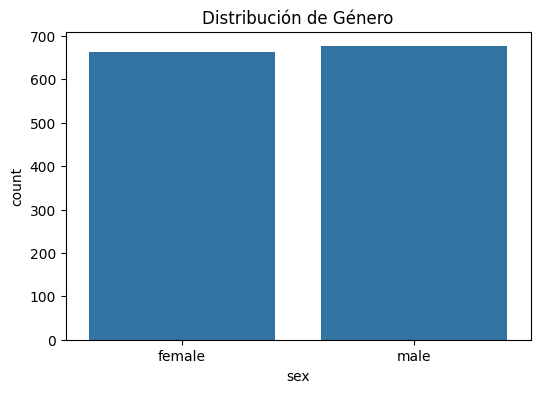

In [7]:
plt.figure(figsize=(6, 4))
sns.countplot(x='sex', data=df)
plt.title('Distribución de Género')
plt.show()

- Distribución de la variable 'smoker'

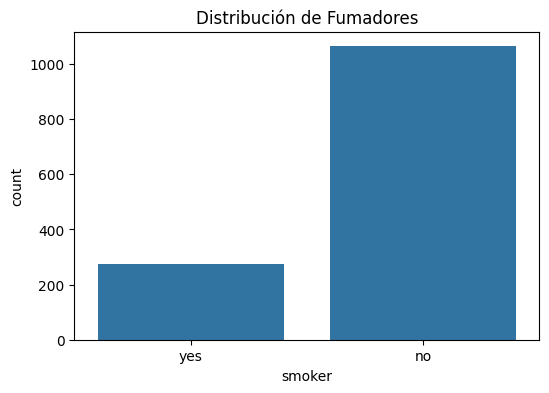

In [8]:
plt.figure(figsize=(6, 4))
sns.countplot(x='smoker', data=df)
plt.title('Distribución de Fumadores')
plt.show()

- Distribución de la variable 'region'

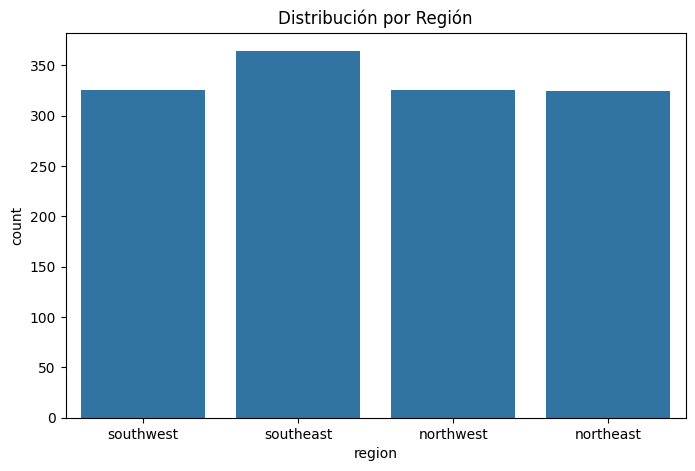

In [9]:
plt.figure(figsize=(8, 5))
sns.countplot(x='region', data=df)
plt.title('Distribución por Región')
plt.show()

- Estos gráficos de barras nos muestran la frecuencia de cada categoría. Hay un desbalance significativo entre fumadores y no fumadores

- Ahora vamos a sacar la matriz de correlación

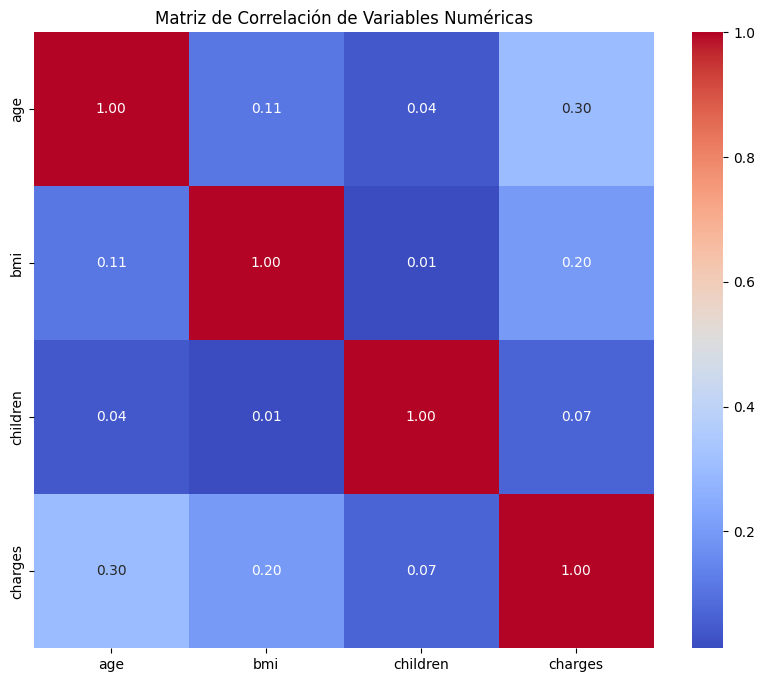

In [10]:
matriz_correlacion = df.select_dtypes(include=np.number).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

- Y vemos que no hay ninguna correlación fuerte, por lo que vamos a pasar con los siguientes pasos

- Aquí divido los datos numéricos y categóricos en variables separadas

In [8]:
categoricas = df.select_dtypes(include=['object']).columns
numericas = df.select_dtypes(include=['int64', 'float64']).columns.drop('charges')

- Aquí procesamos los datos categóricos para que el modelo funcione. Los convertimos con one-hot-encoding

In [11]:
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
caracteristicas_encoded = encoder.fit_transform(df[categoricas])
df_encoded = pd.DataFrame(caracteristicas_encoded, columns=encoder.get_feature_names_out(categoricas))

df_procesado = pd.concat([df.drop(columns=categoricas), df_encoded], axis=1)

- Aquí ya divido las variables "X" y "y" para entrenar el modelo

In [12]:
X = df_procesado.drop('charges', axis=1)
y = df_procesado['charges']

- Se crean los conjuntos de train y test

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- Se entrena el modelo de regresión lineal

In [15]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Se predice con el modelo y el conjunto de test donde no está la variable objetivo

In [16]:
y_pred = model.predict(X_test)
y_pred

array([ 8969.55027444,  7068.74744287, 36858.41091155,  9454.67850053,
       26973.17345656, 10864.11316424,   170.28084137, 16903.45028662,
        1092.43093614, 11218.34318352, 28101.68455267,  9377.73460205,
        5263.0595179 , 38416.04221107, 40255.82339284, 37098.25353123,
       15240.39392306, 35912.88264434,  9112.52398703, 31461.92108909,
        3847.68845883, 10130.12001517,  2370.54189389,  7140.21550828,
       11301.76782638, 12961.65366224, 14509.47251876,  6159.8976107 ,
        9963.85857263,  2177.85718217,  9115.93673493, 13073.68932159,
        4561.82376202,  3408.20756033,  4459.81359745, 13032.06505076,
        1979.99357292,  8813.28303302, 33271.29124448, 32585.51583927,
        3908.76090964,  4326.10774721, 14142.81326533, 11423.45494846,
        8774.13955311, 12097.28051001,  5281.57353499,  3150.5596042 ,
       35494.46461214,  9150.1124786 , 15836.84575621,  2343.57470069,
       12364.78414194,  1482.29488266, 13389.06105161, 12573.57395972,
      

In [17]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

- Y aquí vemos cuáles son los errores

In [18]:
mse

33596915.85136148

In [19]:
rmse

np.float64(5796.284659276275)

In [20]:
r2

0.7835929767120722

- Tiene un buen score r2 del 78%, sin embargo el error medio cuadrático es muy alto, pero esto no significa que esté mal, esto es por los diferentes cargos que hay, como son valores de arriba de 5 números, por eso ese error. Así que podemos decir que está bien el modelo pero se puede mejorar en el regularized linear regression